## This Notebook tries to predict the amount of salary an individual earns with experience

- It Uses Linear reg to do the prediction.
- I used stats acf for showing visual 

In [ ]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import pearsonr, normaltest,norm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf as acf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [4]:
df = pd.read_csv('Salary.csv')

In [5]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
YearsExperience    35 non-null float64
Salary             35 non-null int64
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,35.0,6.308571,3.618610,1.1,3.45,5.3,9.25,13.5
Salary,35.0,83945.600000,32162.673003,37731.0,57019.00,81363.0,113223.50,139465.0


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

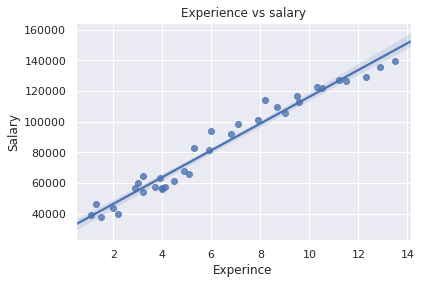

In [10]:
#drawing regression plot based on the columns
sns.set(style='darkgrid')
sns.regplot(df['YearsExperience'],df['Salary'])
plt.title('Experience vs salary')
plt.xlabel('Experince')
plt.ylabel('Salary')
plt.show()

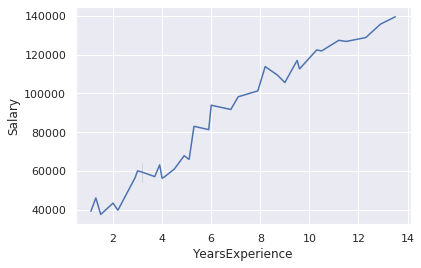

In [11]:
#check for line plot to check diff with regplot
sns.lineplot(df["YearsExperience"] ,df["Salary"])

In [12]:
#pearson relationship
pearsonr(df['YearsExperience'],df['Salary'])

(0.9824272546479685, 1.2309905889925609e-25)

In [13]:
normaltest(df['Salary'])

NormaltestResult(statistic=14.205479321391296, pvalue=0.0008228475094237983)

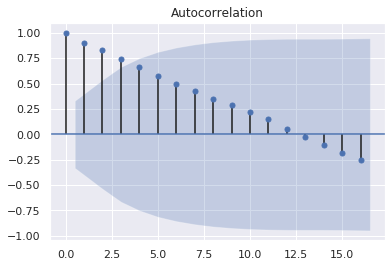

In [14]:
#draw acf graphr frommstarts model
acf(df['Salary'])
plt.show()

In [15]:
x = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

In [17]:
def LinearRegression(x, y, m_current =0, b_current =0,epochs =1000,learning_rate =0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * x) + b_current
        m_gradient = -(2/N) * sum(x * (y - y_current))
        b_gradient = -(2/N) * sum( y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current

In [18]:
m,b = LinearRegression(x, y)

In [19]:
def y_predict(x , m, b):
    return m * x + b

In [20]:
years = int(input("Enter Number Of Years For Predicted Salary:\n"))
y_predict(years,m,b)

Enter Number Of Years For Predicted Salary:
2


array([26499.93069592])